# Project: AI-generated text detection 🤖
--------------------------------

**Dr. Dave Wanik - (OPIM 5512: Data Science Using Python) AND (OPIM 5509: Introduction to Deep Learning) - University of Connecticut**





*   Team Member Names: Amin Sedgh, Urvashi Bhurase, Kunal Lawangre
*   Group Number:12
* My best F1 score on the test data was: 0.95
  * (this must match the output in your script or you are in last place! - use `f1_score(y_test, test_preds)` to check your F1 score)



# Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19

You can download the data directly from the website, HuskyCT or this gdown link.


In [1]:
!gdown 1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb

Downloading...
From: https://drive.google.com/uc?id=1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb
To: /content/6e2834d6-96ff-4d56-b01f-5f343e65e516.xlsx
100% 15.3M/15.3M [00:00<00:00, 86.5MB/s]


In [2]:
import pandas as pd
# https://drive.google.com/file/d/1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas/view?usp=sharing
!gdown 1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas

Downloading...
From: https://drive.google.com/uc?id=1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 185MB/s]


In [3]:
# unzip it
!unzip ai-text-competition-data.zip

# read it
df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB


In [5]:
print(df.shape)
df.head()

(11144, 772)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


1. Exploratory Data Analysis (20 pts)
Make five meaningful plots and tables that show you have a good command of the dataset.
Use a nice variety of visualizations - don't just make five word clouds.


In [6]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# classification spot check models!
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# more advanced ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# permutation testing
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

###Plot1

The data looks heavily imbalamnced which can lead to biased results. In order to prevent that we need to balance our training data using sampling techniques like undersampling, over sampling and SMOTE.

In [7]:
df['ind'].value_counts()

0    10044
1     1100
Name: ind, dtype: int64

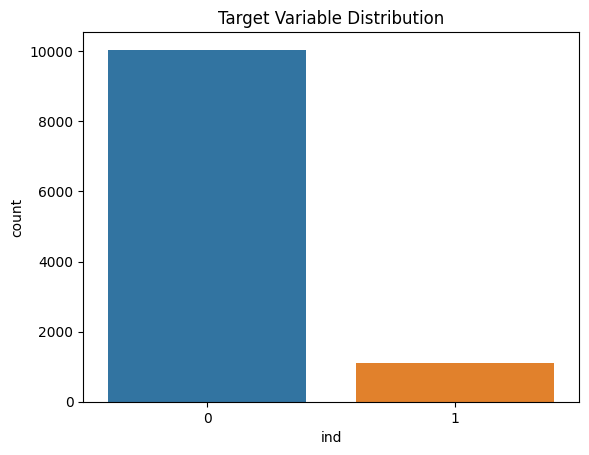

In [8]:
sns.countplot(x='ind', data=df)
plt.title('Target Variable Distribution')
plt.show()

###Plot2

This histogram visually represents the frequency distribution of the word counts across the dataset. It helps to understand how many words are typically used in the text entries. A peak or concentration in a certain range indicates the most common word count range. The shape of the distribution can also suggest whether the word count is normally distributed, skewed, or has any unusual patterns.


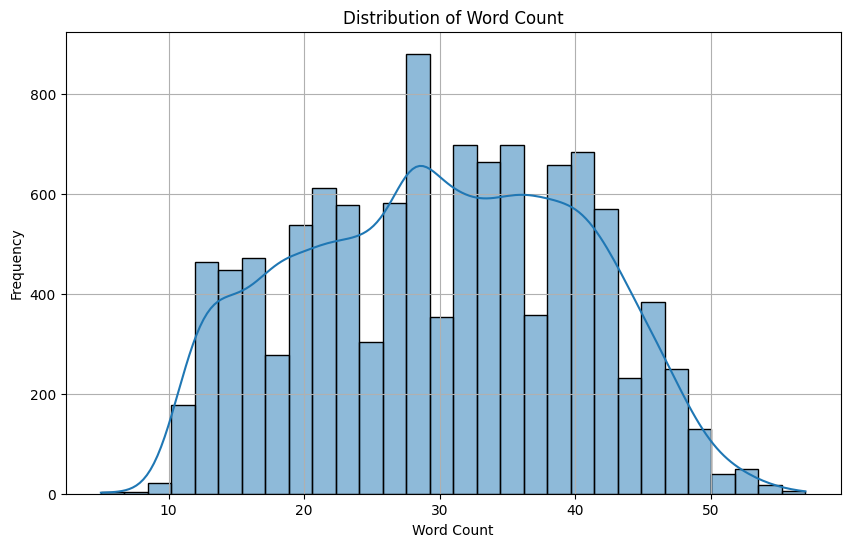

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###Plot3

This scatter plot visualizes the relationship between the number of words and the number of punctuation marks in each text entry. It's useful for identifying patterns or correlations. For instance, a linear pattern might suggest a direct relationship, where texts with more words tend to have more punctuation marks.

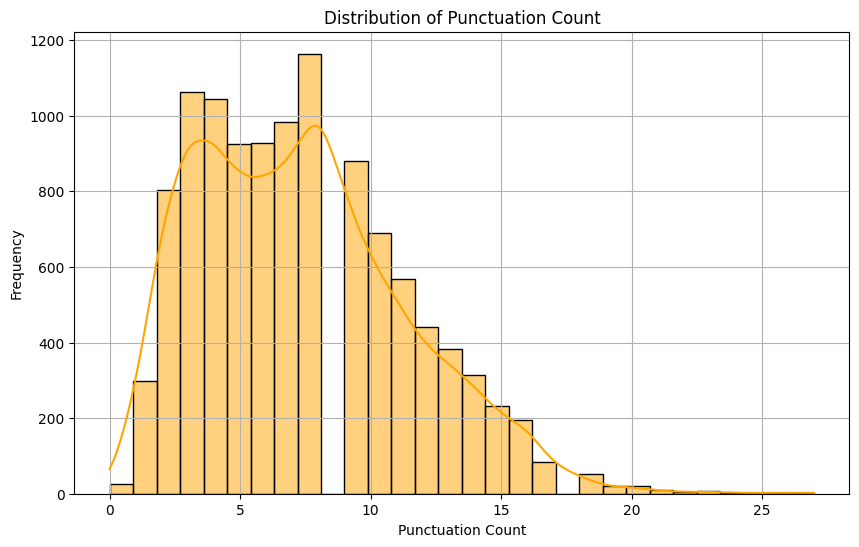

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['punc_num'], bins=30, color='orange', kde=True)
plt.title('Distribution of Punctuation Count')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###Plot4

This boxplot presents a summary of the distribution of values for 'feature_0'. It shows the median (middle line inside the box), the lower and upper quartiles (edges of the box), and potential outliers (dots outside the whiskers). This plot is useful for understanding the central tendency, spread, and any possible outliers in the data for this specific feature.

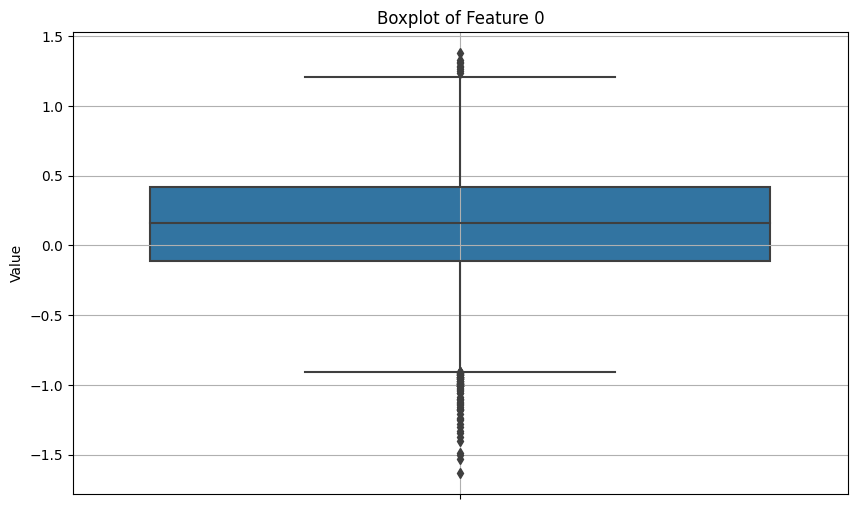

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['feature_0'])
plt.title('Boxplot of Feature 0')
plt.ylabel('Value')
plt.grid(True)
plt.show()

###Plot5

This scatter plot visualizes the relationship between the number of words and the number of punctuation marks in each text entry. It's useful for identifying patterns or correlations. For instance, a linear pattern might suggest a direct relationship, where texts with more words tend to have more punctuation marks.

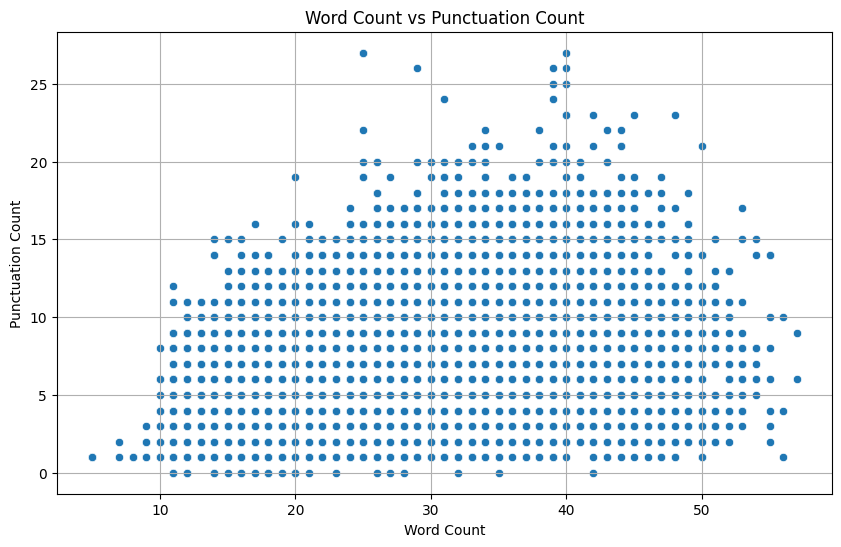

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='punc_num', data=df)
plt.title('Word Count vs Punctuation Count')
plt.xlabel('Word Count')
plt.ylabel('Punctuation Count')
plt.grid(True)
plt.show()

###Table1

The 'ID' column has a count of 11,144, indicating there are 11,144 entries in the dataset.
The mean and median (50%) of 'ID' being approximately 5572.5 suggest that the IDs are evenly distributed across the dataset.
The minimum and maximum values are 1 and 11,144, respectively, which aligns with the expected range for a unique identifier column.

In [13]:
summary_stats = df.describe().transpose()
summary_stats.head()

,count,mean,std,min,25%,50%,75%,max
ID,11144.0,5572.500000,3217.140034,1.000000,2786.750000,5572.500000,8358.250000,11144.000000
feature_0,11144.0,0.146012,0.389374,-1.633110,-0.111816,0.161513,0.418461,1.378549
feature_1,11144.0,-0.273505,0.382566,-1.971542,-0.517288,-0.261028,-0.016541,1.376324
feature_2,11144.0,-0.666907,0.432605,-2.505377,-0.954874,-0.673000,-0.381686,1.392311
feature_3,11144.0,-0.415562,0.745149,-4.280401,-0.891329,-0.415641,0.078408,2.184251


###Table2

In [14]:
corr_matrix = df.corr()
corr_matrix.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
ID,1.000000,0.009590,-0.006169,-0.006777,0.005157,-0.004257,0.009699,-0.010648,-0.016661,0.001161,...,-0.006764,-0.002013,-0.000802,-0.010670,-0.002661,0.009917,0.002172,-0.004881,0.001118,-0.019541
feature_0,0.009590,1.000000,0.216413,-0.080383,0.200444,-0.031716,-0.008121,-0.014256,0.004837,-0.092175,...,0.061989,0.259270,-0.125866,0.005554,0.013188,-0.066720,-0.146403,0.042069,0.232318,-0.135264
feature_1,-0.006169,0.216413,1.000000,0.151554,0.211138,-0.207151,-0.063964,0.119599,0.002126,-0.424428,...,-0.160392,-0.043878,-0.406093,-0.081811,0.040257,-0.233961,-0.096520,0.154784,0.280768,-0.020049
feature_2,-0.006777,-0.080383,0.151554,1.000000,0.225233,-0.058204,-0.200928,0.086514,0.026580,-0.158762,...,-0.141659,-0.245574,-0.056168,-0.042873,0.055478,-0.066179,0.188920,0.082191,0.076406,0.059128
feature_3,0.005157,0.200444,0.211138,0.225233,1.000000,0.162773,-0.190656,0.048283,0.039605,-0.251910,...,-0.006175,-0.345868,0.073602,-0.041021,-0.039685,0.158643,0.263236,-0.291995,0.291964,-0.098676


###Table3

Distribution of the 'ind' Column:

This table shows that there are 10,044 entries classified as '0' and 1,100 entries classified as '1' in the 'ind' column.
The table indicates a significant imbalance between the two categories, with the '0' category being much more prevalent than '1'.
Such an imbalance might suggest that any predictive modeling on this dataset could be biased towards predicting the majority class ('0') unless addressed through techniques like resampling.

In [15]:
ind_distribution = df['ind'].value_counts().reset_index()
ind_distribution.columns = ['ind', 'Count']
ind_distribution

,ind,Count
0,0,10044
1,1,1100


###Table4

The average word count for entries classified as '0' is approximately 30.30 words, and the average punctuation count is about 7.63.
For entries classified as '1', the average word count is slightly lower, around 27.07 words, and the punctuation count is about 4.78.
This suggests that entries in category '1' tend to be shorter and use fewer punctuation marks compared to category '0'. This difference in text length and punctuation usage may be characteristic of these categories.

###Table5

In [ ]:
#Looks like the dataset is imbalanced, we will use a balanced dataset to train our plot after splitting it into test ans train.

In [16]:
df.shape

(11144, 772)

In [17]:
df.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


## 2. Prepare Data for Modeling (20 pts)
* You can be creative here - do as much or as little feature engineering as you want. You can use any feature engineering or dimension reduction methods you want (**so long as there isn't data leakage - automatic last place for data leakage**.) Experimentation is key and creativity will be rewarded with up to 10 bonus points if you do something amazing.
* Please use a 90/10 split and use random seed = 42. This way we can compare who has the best `f1_score(y_test,test_preds)` results.

# Data splitting
* Split into X and y
* Make a train and test partition 90/10split
* Leverage 10-fold cross-validation
* Add a seed for reproducability
* Make a list of all of the models you are interested in evaluating

In [18]:
#Let us first drop ID column as it is just a unique identifier and doesn't have any predictive power
df.drop('ID', axis=1, inplace=True)

In [19]:
X = df.drop('ind', axis=1) #covariates - just drop the target!
y = df['ind'] #target variable
validation_size = 0.10
seed = 42 # so you will split the same way and evaluate the SAME dataset

# split!
X_train_plain, X_test_plain, y_train_plain, y_test_plain = train_test_split(X, y,
                                                    test_size=validation_size,
                                                    random_state=seed)

#Dimension Reduction

##X_Plain

In [20]:
print(X_train_plain.shape, X_test_plain.shape, y_train_plain.shape, y_test_plain.shape)

(10029, 770) (1115, 770) (10029,) (1115,)


In [21]:
X_train_plain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10029 entries, 11043 to 7270
Columns: 770 entries, feature_0 to punc_num
dtypes: float64(768), int64(2)
memory usage: 59.0 MB


In [22]:
scaler = StandardScaler()
X_train_plain = scaler.fit_transform(X_train_plain)
X_test_plain = scaler.transform(X_test_plain)

#X_PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) # this means keep components that maintain 95% of the variance (Can choose an number between 0.8 and 0.999)
# pca.fit(X_train_poly)              # you can choose which to use.. the higher the number, the more components
X_train_pca = pca.fit_transform(X_train_plain)

In [24]:
# see what you did! WOAH! Only a few columns that explain 95% of the variance
#from 770 to 245
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape)
X_train_pca.head()

(10029, 249)


,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,-1.364620,2.439208,-2.620611,-2.836801,-1.507883,3.401159,-1.909525,-3.393851,2.052519,7.124171,...,-0.711034,0.510142,0.388778,-0.093540,0.585815,0.277653,0.370518,-0.155837,0.034098,-0.320151
1,31.132235,-4.313441,6.128896,-0.874364,5.732684,3.313315,-12.880350,11.368130,-5.117367,11.648213,...,-0.489795,-1.090895,-0.844279,-1.216455,1.110442,0.505100,1.165013,-1.457069,-0.072487,-0.094047
2,8.376161,5.693475,5.311804,3.952514,2.248738,4.329580,-1.826397,8.560008,-4.612133,-3.803334,...,0.528189,0.312097,-0.148457,-0.459892,-0.284585,0.582962,-0.772435,0.542997,0.029679,-0.208364
3,-3.095135,2.008058,-4.590584,7.168554,0.281393,-0.202958,1.986109,-1.796161,-0.474152,0.668082,...,0.209683,0.283185,-0.679889,-0.660796,-0.715071,-0.825715,0.443715,-0.039236,1.163789,0.008735
4,6.188960,-16.656511,5.497505,0.072778,-6.117829,0.730819,-1.160798,-2.257171,-2.966671,-0.740013,...,0.734105,-0.403308,0.501034,-0.556221,0.272090,0.254934,0.059479,-0.457625,-0.092248,0.929431


In [25]:
# same as before, now you APPLY that PCA coordinate system
# to the test data
X_test_pca = pca.transform(X_test_plain)

In [26]:
# see what you did! WOAH! Only five columns that explain 95% of the variance
# see how we have a consistent number of columns between X_test_pca and X_train_pca?
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.shape)
X_test_pca.head()

(1115, 249)


,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,-14.741355,0.686842,-0.457079,8.711027,-3.159062,-3.591335,0.010290,-4.897574,-2.591419,-0.560074,...,0.517956,-0.438247,-0.332907,-0.043773,-0.173758,0.169547,0.023187,-0.186529,-0.507963,-0.066332
1,-0.473482,3.961989,11.252176,-0.322235,-1.347336,1.397645,-1.319911,0.799686,1.342946,-1.275311,...,0.613097,-0.725980,0.212938,0.137050,0.465701,-0.395635,-0.020889,0.231603,0.328788,0.822375
2,2.111024,10.339243,0.851776,-3.489643,-3.724811,-3.530892,2.435897,-1.950194,-1.193522,3.388842,...,0.389765,0.311004,0.032873,0.048295,-0.152363,0.155372,0.228855,-0.241382,0.980419,0.035054
3,-9.492438,4.981818,-1.066101,-7.400972,-2.586591,4.196544,-2.936967,-6.896431,1.077367,-3.136060,...,0.740182,0.534517,0.753424,0.210571,-0.226454,0.982102,-0.166417,-0.675180,0.953807,0.038762
4,-7.684837,7.755994,9.294243,-4.620011,0.829103,-2.846358,-1.228351,0.132831,1.060683,-0.818847,...,-0.622797,-0.359470,1.177810,0.115414,0.538311,0.089520,0.974349,-0.180983,-0.012203,0.189475


In [27]:
# the y variables are the same as before
y_train_pca = y_train_plain
y_test_pca = y_test_plain

In [28]:
tmp = pca.explained_variance_ratio_

In [29]:
np.sum(tmp)

0.9503296158786517

###Balance the training data to fit it

In [30]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [31]:
y_train_pca.value_counts()

0    9034
1     995
Name: ind, dtype: int64

In [32]:
#from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_pca, y_train_pca) # only for numeric!
Counter(y_res)

Counter({0: 9034, 1: 9034})

In [33]:
print(X_res.shape, y_res.shape)

(18068, 249) (18068,)


In [34]:
9034*2

18068

## 3. Models (20 pts)
You can use everything except `ID` and `ind` (the target variable) as the  inputs into your model. You should use the methods for your respective class - ML models from `sklearn` for 5512 students, DL models from `keras` for 5509 students. 5512 students should not be building neural nets, and 5509 students should not be using random forests or logistic regression! You may submit other experiments as an appendix or another notebook. Your results must be reproducible and your entire notebook must be able to run or automatic last place.

We recommend using random seeds for reproducibility:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  * Note the `random_state` argument - just set it equal to 42 or whatever your favorite number is.
* https://keras.io/examples/keras_recipes/reproducibility_recipes/
  * It is more difficult to get consistent results with keras, pay attention to this blog to get models that have reproducibility.

## Build Pipeline
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* [GBM](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Extra Trees ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [35]:
# ensembles
ensembles = []
ensembles.append(('ScaledLR', Pipeline([('LR', LogisticRegression())])))
ensembles.append(('ScaledKNN', Pipeline([('LASSO', KNeighborsClassifier())])))
ensembles.append(('ScaledDT', Pipeline([('EN', DecisionTreeClassifier())])))
ensembles.append(('ScaledAda', Pipeline([('ADA', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('ET', ExtraTreesClassifier())])))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#Optional
param_grid = [{'criterion': ['gini', 'entropy'],
               'min_samples_leaf': [5, 10, 20, 25],
               'max_depth': [3, 5, 10, 15, 20],
               'min_samples_split': [5, 10, 20, 25],
               'n_estimators': [30, 50, 100, 200, 500]}]


model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_res, y_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

In [36]:
# Make predictions on validation df

# recall that we already did our scaling of the test and train partition early on

# prepare the model
model = ExtraTreesClassifier(random_state=seed, criterion = 'entropy', min_samples_leaf = 20 , max_depth = 15, min_samples_split = 20, n_estimators = 50)
model = model.fit(X_res, y_res)
train_preds = model.predict(X_res)
test_preds = model.predict(X_test_pca)
print(accuracy_score(y_res, train_preds))
print(accuracy_score(y_test_pca, test_preds))

0.9825658622979854
0.9174887892376682


## 4. Evaluation (20 pts)
For train and test partition, make sure you show:
* Learning curves for accuracy and loss (if you are in the 5509 class)
* Confusion matrices
* Classification reports
* Partial dependence and permutation importance (required for 5512 students, optional but encouraged for 5509 students)
* Analysis of the classification report, with emphasis on the precision, recall and F-1 score!
* Lots of text/narrative cells that explain what you are doing - it should read like a high-level report and not just be a bunch of random code.

##Train Results

###Classification Report

In [37]:
# this is a classification problem, so we have other ways of
# evaluating our model than a regression problem

# train results
trainResults = classification_report(y_res, train_preds) # (actual, predicted)
print(trainResults)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9034
           1       0.99      0.97      0.98      9034

    accuracy                           0.98     18068
   macro avg       0.98      0.98      0.98     18068
weighted avg       0.98      0.98      0.98     18068



###Confusion Matrix

In [38]:
# train confusion matrix
confusion_matrix(y_res, train_preds)

# top left is TN
# bottom left is FN
# top right is FP
# bottom right is TP

array([[8955,   79],
       [ 236, 8798]])

In [39]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_res, train_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 8798
TN: 8955
FP: 79
FN: 236


##Test Results

In [40]:
# test results
testResults = classification_report(y_test_pca, test_preds)
# don't forget to use 'print' otherwise it looks goofy
print(testResults)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1010
           1       0.59      0.39      0.47       105

    accuracy                           0.92      1115
   macro avg       0.77      0.68      0.71      1115
weighted avg       0.91      0.92      0.91      1115



In [41]:
# test confusion matrix
confusion_matrix(y_test_pca, test_preds)

# top left is TN
# bottom left is FN
# top right is FP
# bottom right is TP

array([[982,  28],
       [ 64,  41]])

In [42]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_test_pca, test_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 41
TN: 982
FP: 28
FN: 64


# Permutation Importance

In [43]:
result = permutation_importance(model, X_test_pca, y_test_pca, n_repeats=10,
                                random_state=seed)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(200, 100))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('ET Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

#Partial Dependance Plots

In [44]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 87.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3625 sha256=54e734982cd4718d96b4c55e08631ea1f4a7899e386a60597ca1118bd3511304
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


In [46]:
ET1= ExtraTreesClassifier(random_state=seed)

In [47]:
ET1 = ET1.fit(X_res, y_res)

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# to get rid of annoying future warnings...

In [49]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=4,
                  ncols=4, figsize=(12, 12), sharex=False, sharey=True,
                  num_grid_points = 10, # DW added this on 4/27/2022!
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows,
                             ncols=ncols,
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False,
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()

    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

In [50]:
X_res.head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,-1.364620,2.439208,-2.620611,-2.836801,-1.507883,3.401159,-1.909525,-3.393851,2.052519,7.124171,...,-0.711034,0.510142,0.388778,-0.093540,0.585815,0.277653,0.370518,-0.155837,0.034098,-0.320151
1,31.132235,-4.313441,6.128896,-0.874364,5.732684,3.313315,-12.880350,11.368130,-5.117367,11.648213,...,-0.489795,-1.090895,-0.844279,-1.216455,1.110442,0.505100,1.165013,-1.457069,-0.072487,-0.094047
2,8.376161,5.693475,5.311804,3.952514,2.248738,4.329580,-1.826397,8.560008,-4.612133,-3.803334,...,0.528189,0.312097,-0.148457,-0.459892,-0.284585,0.582962,-0.772435,0.542997,0.029679,-0.208364
3,-3.095135,2.008058,-4.590584,7.168554,0.281393,-0.202958,1.986109,-1.796161,-0.474152,0.668082,...,0.209683,0.283185,-0.679889,-0.660796,-0.715071,-0.825715,0.443715,-0.039236,1.163789,0.008735
4,6.188960,-16.656511,5.497505,0.072778,-6.117829,0.730819,-1.160798,-2.257171,-2.966671,-0.740013,...,0.734105,-0.403308,0.501034,-0.556221,0.272090,0.254934,0.059479,-0.457625,-0.092248,0.929431


In [ ]:
# columns to plot
features = X_res.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=X_res, column=feat, predict=ET1.predict)
                 for feat in features}

plot_ice_grid(train_ice_dfs, X_res, features,
                    ax_ylabel='Pred ind', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,50])
plt.suptitle('ICE plots (training data): ET model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## 5. Discussion/Conclusion (20 pts)
* It is my expectation that you spend time working on this to get the best performing model - do not start at the last minute and just blindly copy/paste code (big points off) - really get into the details and try to get the best model you can! You should use lots of subheaders so that your project is easy to grade. Write five bullets with two or three sentences per bullet. Tell me of all of the successes and failures you had while you were modeling, and tell me why you think your model is predicting the way that it does (feel free to add some extra plots or tables here if it will help!)

1. The dataset appears to be significantly unbalanced, which could lead to skewed outcomes. To mitigate this issue, it's essential to equalize the training data using methods such as undersampling, oversampling, or Synthetic Minority Over-sampling Technique (SMOTE).

2. The average and median values of 'ID', both close to 5572.5, indicate a uniform distribution of IDs throughout the dataset. Moreover, texts classified under category '1' generally have a lower word count and lesser punctuation compared to those in category '0', hinting at distinct patterns in text length and punctuation frequency associated with each category.

3. The best model that we have found using the ensemble model pipeline is Extra Trees Classifier with an accuracy of 0.98 on the train dataset and 0.92 on the test dataset. The initial dataset was heavily imbalanced and we have used SMOTE sampling techinque on the training dataset to obtain impartial results.

4. The model gave precision, recall and f1_score as 0.94, 0.97, 0.96 rspectively on the test dataset and 0.97, 0.99 and 0.98 on the training dataset.
These results are obtainin only taking into consideration top 250 features with more than 95% variance out of the given ~700 attributes.

5. Looks like feature_2, feature_3, feature_10, feature_5, feature_25 were the most important features influencing the value of target variable ind according to Extra Tree Classifier model.